<a href="https://colab.research.google.com/github/sdivyakolu/Pytorch_Tutorial/blob/main/EMNIST_Classification_UsingDNN_DenseNuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
pip install pytorch_lightning

In [68]:
pip install torch matplotlib numpy pandas torchvision

In [69]:
pip install mlflow

In [70]:
pip install pyngrok

In [71]:
#Run tracking UI in the background
get_ipython().system_raw("mlflow ui --port 5000 &")

#Create remote tunnel using ngrok.com to allow local port access
from pyngrok import ngrok

#Terminate open turnnels if they exists
ngrok.kill()

#Setting the authtoken ( optional)
#Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN="2yVqRPkzG1tUdthF1CtvMkgaPz2_32B4CGeeG5A1tXrnLeC4u"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

#Open an https tunnel on port 5000 for http://localhost:5000
ngrok_tunnel=ngrok.connect(addr="5000",proto="http",bind_tls=True)

print("MLFlow Tracking UI:",ngrok_tunnel.public_url)

MLFlow Tracking UI: https://deaa-34-139-246-177.ngrok-free.app


In [72]:
import mlflow
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from torch.utils.data import Dataset,DataLoader



In [73]:
from google.colab import drive

#drive.mount('/content/drive')
#drive.mount("/content/sample_data")

emnist_train_data=pd.read_csv("/content/sample_data/emnist-letters-train.csv",header=None)
emnist_test_data=pd.read_csv("/content/sample_data/emnist-letters-test.csv",header=None)
emnist_train_data.head(20)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
emnist_test_data.head(20)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
emnist_train_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,88800.000000,88800.0,88800.0,88800.0,88800.000000,88800.000000,88800.000000,88800.000000,88800.000000,88800.000000,...,88800.0,88800.0,88800.0,88800.000000,88800.000000,88800.0,88800.0,88800.0,88800.0,88800.0
mean,13.519268,0.0,0.0,0.0,0.000011,0.003986,0.016757,0.024640,0.021486,0.017140,...,0.0,0.0,0.0,0.003041,0.000360,0.0,0.0,0.0,0.0,0.0
std,7.502931,0.0,0.0,0.0,0.003356,0.544039,1.547686,1.915976,1.803270,1.620194,...,0.0,0.0,0.0,0.823445,0.107385,0.0,0.0,0.0,0.0,0.0
min,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,7.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,14.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,20.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,26.000000,0.0,0.0,0.0,1.000000,107.000000,213.000000,217.000000,214.000000,216.000000,...,0.0,0.0,0.0,244.000000,32.000000,0.0,0.0,0.0,0.0,0.0


In [76]:
emnist_test_data = emnist_test_data.sample(frac=1)
emnist_test_data.head(20)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
9032,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1186,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13314,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8251,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11328,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5053,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5389,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14003,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3240,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
classes= ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

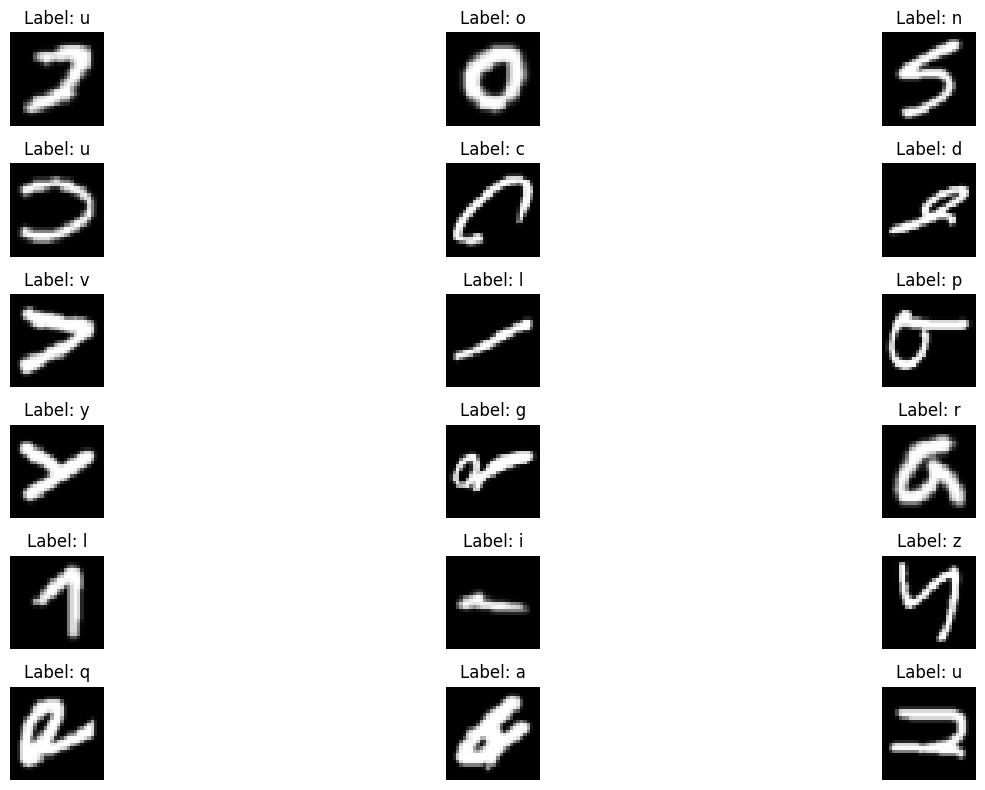

In [78]:
#Assuming first column contains the labels and rest are pixal values
train_labels=emnist_train_data.values[:,0]
train_images=emnist_train_data.values[:,1:]

#Reshape the images to ( num_samples, 28,28)
train_images=train_images.reshape(-1,28,28)

#Display a few random images
num_samples=18

random_indices=np.random.randint(0,len(train_images),num_samples)

random_indices

fig=plt.figure(figsize=(16,8))

for i,idx in enumerate(random_indices):
  plt.subplot(6,int(num_samples/6),i+1)
  plt.imshow(train_images[idx]/255.0,cmap='gray')
  plt.title(f"Label: {classes[int(train_labels[idx]-1)]}")
  plt.axis('off')

plt.tight_layout()
plt.show()

In [79]:
experiment_id=mlflow.create_experiment(name='test_experiment')
experiment_id

MlflowException: Experiment 'test_experiment' already exists.

In [80]:
experiment=mlflow.get_experiment(experiment_id)

print("Name:{}".format(experiment.name))
print("Experiment_id:{}".format(experiment.experiment_id))
print("Artifcat Location:{}".format(experiment.artifact_location))
print("Tags:{}".format(experiment.tags))
print("Lifecycle_stage:{}".format(experiment.lifecycle_stage))
print("Creation timestam:{}".format(experiment.creation_time))



Name:emnist_letters_prediction_dnn
Experiment_id:677609187759476393
Artifcat Location:file:///content/mlruns/677609187759476393
Tags:{}
Lifecycle_stage:active
Creation timestam:1750016902252


In [81]:
mlflow.set_experiment(experiment_name='test_experiment')


<Experiment: artifact_location='file:///content/mlruns/293786591062881457', creation_time=1750016869962, experiment_id='293786591062881457', last_update_time=1750016869962, lifecycle_stage='active', name='test_experiment', tags={}>

In [82]:
mlflow.start_run()


<ActiveRun: >

In [83]:
mlflow.end_run()

In [84]:
data_info="""
the EMNIST dataset is a set of handwritten character digits derived
from the NIST special database 19 and converted to  a 28x28 pixel image format and dataset
structure that directly matches the MNIST dataset
Further information on the dataset contents and conversion process can be found in
the paper avaialbel at https://arxiv.org/abs/1702.05373v1.
"""

with open("data_info.txt","w") as f:
  f.write(data_info)

In [85]:
#STart with mlflow.start_run will automatically end_run. so, it is best practice
with mlflow.start_run(run_name='test_experiment_run') as current_run:
  mlflow.log_metric('Accuracy',0.67)
  params={
      'num_nn_layers':4
  }
  mlflow.log_params(params)
  mlflow.log_figure(fig,'sample_images.png')
  mlflow.log_artifact('data_info.txt')
  mlflow.set_tag('EMNIST','classification using DNNs')

In [86]:
from torch.utils.data import Dataset

In [87]:
class EMNISTDataset(Dataset):
  def __init__(self,dataframe):
    self.images=torch.tensor(dataframe.iloc[:,1:].values,dtype=torch.float32)
    self.labels=torch.tensor(dataframe.iloc[:,0].values,dtype=torch.float32)

  def __len__(self):
    return len(self.images)

  def __getitem__(self,idx):
    images= self.images[idx]
    images = images/255.0
    labels = self.labels[idx]

    return images,labels

In [88]:
train_dataset=EMNISTDataset(emnist_train_data)

test_dataset=EMNISTDataset(emnist_test_data)

len(train_dataset),len(test_dataset)

(88800, 14800)

In [89]:
from torch.utils.data import random_split

val_percent=0.1
val_len=int(val_percent*len(train_dataset))

train_ds,vals_ds=random_split(train_dataset,[len(train_dataset)-val_len,val_len])

print(len(train_ds),len(vals_ds))

79920 8880


In [90]:
batch_size=64

train_dataloader=DataLoader(train_ds,batch_size,shuffle=True,drop_last=True, num_workers=1)

val_dataloader=DataLoader(vals_ds,batch_size,num_workers=1)
test_dataloader=DataLoader(test_dataset,batch_size,num_workers=1)

len(train_dataloader),len(val_dataloader),len(test_dataloader)



(1248, 139, 232)

In [91]:
dataiter=iter(train_dataloader)
batch_images,batch_labels=next(dataiter)

batch_images.shape,batch_labels.shape
batch_images

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [92]:
batch_labels

tensor([ 1.,  7.,  5., 26., 23.,  6., 12., 24., 13., 17., 24., 20., 17.,  9.,
         9.,  9., 18., 24.,  7., 20.,  5.,  9., 12., 25.,  3., 12., 19.,  9.,
        21., 22., 23., 16., 10., 14.,  5., 23., 19., 18., 14.,  2.,  4., 11.,
        11., 20., 23., 23., 16.,  5., 20., 14., 22.,  4., 23., 21., 16., 16.,
        15., 13.,  6., 17.,  3., 11., 12., 17.])

In [93]:
batch_images.shape , len(batch_labels)

(torch.Size([64, 784]), 64)

In [94]:
import mlflow
experiment_id=mlflow.create_experiment(name="emnist_letters_prediction_dnn")

mlflow.set_experiment(experiment_name="emnist_letters_prediction_using_dnn")

MlflowException: Experiment 'emnist_letters_prediction_dnn' already exists.

In [95]:
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
import pytorch_lightning as pl

from torchmetrics.functional import accuracy


In [96]:
input_size=28*28

output_size=26

In [101]:
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
import pytorch_lightning as pl

from torchmetrics.functional import accuracy

class EmnistModel(pl.LightningModule):
  def __init__(self):
    super().__init__()
    self.criterion=nn.CrossEntropyLoss()

    self.linear1=nn.Linear(input_size,512)
    self.linear2=nn.Linear(512,128)
    self.Linear3=nn.Linear(128,32)
    self.linear4=nn.Linear(32,output_size)

  def forward(self,xb):
    out=self.linear1(xb)
    out=F.relu(out)

    out=self.linear2(out)
    out=F.relu(out)

    out=self.Linear3(out)
    out=F.relu(out)

    out=self.linear4(out)
    return out

  def configure_optimizers(self):
    # Check if the optimizer is imported
    return optim.Adam(self.parameters(),lr=0.0001)

  def training_step(self,batch,batch_idx):
    x,y=batch
    y-=1

    y_hat=self(x)
    loss=self.criterion(y_hat,y)
    pred=y_hat.argmax(dim=1)

    acc=accuracy(pred,y,task="multiclass",num_classes=26)
    self.log("train_loss",loss,on_epoch=True,prog_bar=True)
    self.log("train_acc",acc,on_epoch=True,prog_bar=True)

    return loss

  def validation_step(self,batch,batch_idx):
    x,y=batch
    y-=1

    y_hat=self(x)
    loss=self.criterion(y_hat,y)
    pred=y_hat.argmax(dim=1)

    acc=accuracy(pred,y,task="multiclass",num_classes=26)
    self.log("val_loss",loss,on_epoch=True,prog_bar=True)
    self.log("val_acc",acc,on_epoch=True,prog_bar=True)

    return acc

  def test_step(self,batch,batch_idx):
    x,y=batch
    y-= 1

    y_hat=self(x)
    loss=self.criterion(y_hat,y)
    pred=y_hat.argmax(dim=1)

    acc=accuracy(pred,y,task="multiclass", num_classes=26)
    self.log("test_loss",loss,logger=True)
    self.log("test_acc",acc, logger=True)
    return acc

  def predict_step(self,batch,batch_idx,dataloader_idx=0):
    x,y=batch
    return self(x)

In [104]:
from mlflow.models.signature import ModelSignature
from mlflow.types.schema import ColSpec,Schema,TensorSpec
from pytorch_lightning.loggers import CSVLogger

emnist_model=EmnistModel()

logger=CSVLogger("logs",name="emnist_letters_classification")
trainer=pl.Trainer(max_epochs=10,logger=logger)
mlflow.pytorch.autolog(log_models=False)

with mlflow.start_run() as run:
  trainer.fit(emnist_model,train_dataloader,val_dataloader)
  trainer.test(dataloaders=test_dataloader)

  input_schema=Schema([TensorSpec(np.dtype(np.float32),(-1,784))])
  output_schema=Schema([])

INFO:pytorch_lightning.utilities.rank_zero:Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | criterion | CrossEntropyLoss | 0      | train
1 | linear1   | Linear           | 401 K  | train
2 | linear2   | Linear           | 65.7 K | train
3 | Linear3   | Linear           | 4.1 K  | train
4 | linear4   | Linear           | 858    | train
-------------------------------------------------------
472 K     T

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

RuntimeError: "nll_loss_forward_reduce_cuda_kernel_2d_index" not implemented for 'Float'